In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3574734089662119977
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14357954560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2901940535593555962
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras import Model  # Replacing 'training'
from tensorflow.keras.layers import Layer  # Replacing 'VersionAwareLayers'
from tensorflow.keras import utils  # You can use specific utility functions from here


In [5]:
# Tensorflow essentials
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,MaxPool2D,GlobalAveragePooling2D


from tensorflow.keras.applications import VGG16

import numpy as np
import pandas as pd
import os
from sklearn.metrics import *
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import cv2
from glob import glob
from pathlib import Path
import random

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Load the images**

In [6]:
dire= '/content/drive/MyDrive/Augmented data (140 each folder)'

categories= ['1. Battery', '10. USB_Port',  '11. Wifi_Card', '12. Speaker','13. CMOS_Battery','14. Hard_Disk_Drive',
             '15. Webcam','16. LCD_Screen','17. LCD_screen_panel_Bezel','18. Heatsink','19. SSD', '2. DVD_Rom','20. CPU_Fan',
             '21. Touchpad', '22. Processor','23. RAM_Cover','24. Base_Panel','25. Top_Panel','26. Sim_Slot','27. LVDS_DisplayRibbon_Cable',
             '3. Hinge', '4. Keyboard', '5. Motherboard', '6. Dc_Cable', '7. Power_Switch', '8. RAM', '9. Screw_Kit']

In [7]:
features = []

for i in tqdm(categories):
    path = os.path.join(dire, i)
    num_classes = categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, (224, 224))
            features.append([img_array, num_classes])


100%|██████████| 27/27 [20:44<00:00, 46.11s/it]


In [8]:
X=[]
y=[]

for i,j in features:
    X.append(i)
    y.append(j)

**Some Component images**

In [9]:
fig,ax=plt.subplots(4,4)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range (4):
        l=np.random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Comp: '+categories[y[l]])
plt.axis('off')
plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

Reshaping and normalizing: the need of resizing the feature vetcor x is to meet the keras requirement and normalization is done to scale all the values in a similar range


In [10]:
X=np.array(X).reshape(-1,224,224,3)/255.0

**visualization of number of componets per catagori**

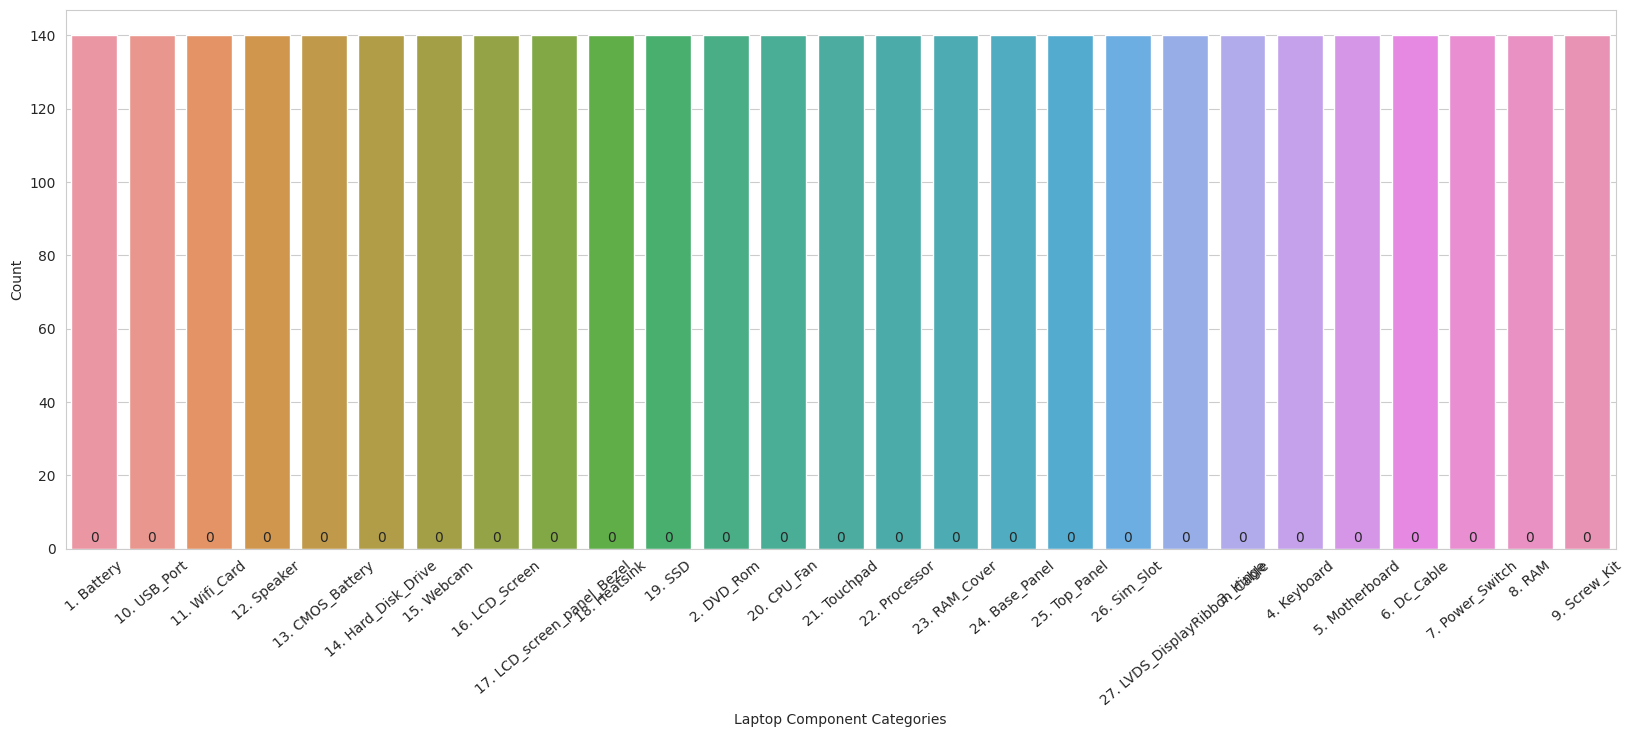

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

category_counts = [y.count(i) for i in categories]

sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
fig = sns.countplot(x=y)
plt.ylabel('Count')
plt.xlabel('Laptop Component Categories')
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=40)

for i, count in enumerate(category_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()


In [12]:
list1_Battery=len([i for i in y if i==0])
list_10_USB=len([ i for i in y if i==1])
list11_Wifi_card=len([i for i in y if i==2])
list12_Speaker = len([i for i in y if i==3])
list13_CMOS_battery=len([i for i in y if i==4])
list14_Hard_disk_drive=len([i for i in y if i==5])
list15_Webcam=len([i for i in y if i==6])
list16_LCD_screen=len([i for i in y if i==7])
list17_LCD_screen_panel_bezel=len([i for i in y if i==8])
list18_Heatsink=len([i for i in y if i==9])
list19_SSD=len([i for i in y if i==10])
list2_DVD_rom=len([i for i in y if i==11])
list20_CPU_Fan=len([i for i in y if i==12])
list21_Touchpad=len([i for i in y if i==13])
list22_Processor=len([i for i in y if i==14])
list23_RAM_cover=len([i for i in y if i==15])
list24_Back_Part=len([i for i in y if i==16])
list25_Front_Part=len([i for i in y if i==17])
list26_Sim_slot=len([i for i in y if i==18])
list27_LCD_LED_LVDS_DisplayRibbon =len([i for i in y if i==19])
list3_Hinge=len([i for i in y if i==20])
list4_Keyboard=len([ i for i in y if i==21])
list5_Motherboard=len([i for i in y if i==22])
list6_Dc_Cable = len([i for i in y if i==23])
list7_Power_switch=len([i for i in y if i==24])
list_8_RAM=len([i for i in y if i==25])
list9_Screw_kit=len([i for i in y if i==26])

list_species=[list1_Battery, list_10_USB, list11_Wifi_card,list12_Speaker, list13_CMOS_battery,
              list14_Hard_disk_drive, list15_Webcam, list16_LCD_screen,list17_LCD_screen_panel_bezel,
              list18_Heatsink,list19_SSD,list2_DVD_rom,list20_CPU_Fan,list21_Touchpad,list22_Processor,
              list23_RAM_cover,list24_Back_Part,list25_Front_Part,list26_Sim_slot,list27_LCD_LED_LVDS_DisplayRibbon,
              list3_Hinge,list4_Keyboard,list5_Motherboard,list6_Dc_Cable,list7_Power_switch,list_8_RAM, list9_Screw_kit]

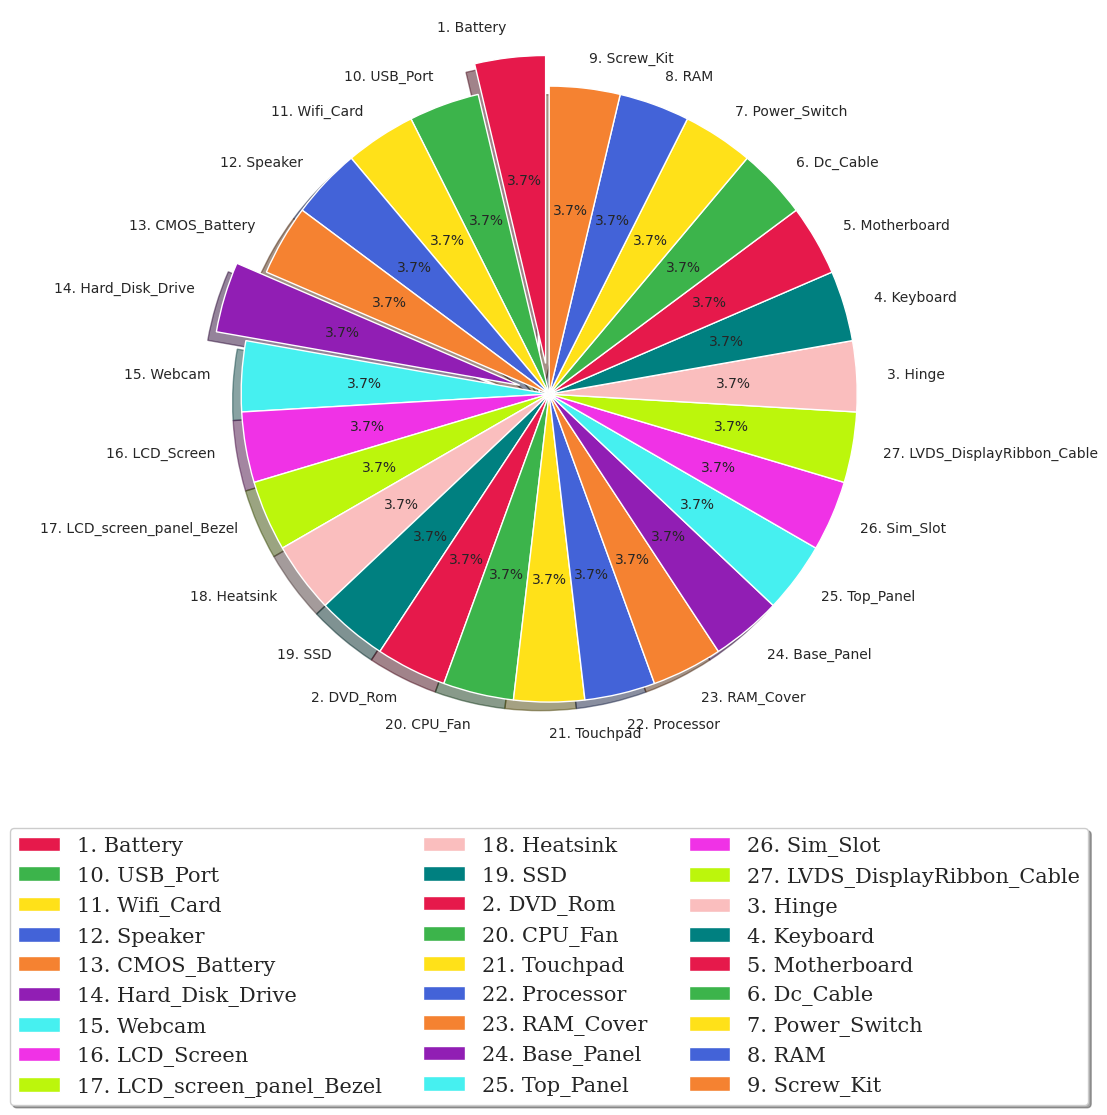

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.pie(list_species,labels=categories,startangle=90,colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080'],
        autopct='%1.1f%%',explode = (0.1,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),shadow=True,textprops={'fontsize': 10})

# plt.title('Percentage of images per class', fontsize = 20)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),prop={'size': 15},
          fancybox=True, shadow=True, ncol=3)
plt.show()

In [14]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

**Train Test split**

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=12)

In [16]:
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of x_test", x_test.shape)
print("Shape of y_test", y_test.shape)

Shape of x_train (3024, 224, 224, 3)
Shape of y_train (3024, 27)
Shape of x_test (756, 224, 224, 3)
Shape of y_test (756, 27)


**Augmentation to avoid overfitting**

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

**callbacks**

In [18]:
keras.backend.clear_session()
#callback function for early stopping

accuracy_threshold = 0.99999

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>99.99):
            print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
            self.model.stop_training = True

acc_callback = myCallback()

In [19]:
def report_generate(Y_test, predictions):
    report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = predictions, output_dict=True)).transpose()
    report = report.rename(index={'0': '1. Battery','1':'2. DVD_Rom','2':'3. Hinge', '3':'4. Keyboard', '4':'5. Motherboard', '5':'6. Dc_Cable',
                                  '6':'7. Power_Switch', '7':'8. RAM', '8':'9. Screw_Kit', '9':'10. USB_Port',  '10':'11. Wifi_Card', '11':'12. Speaker',
                                  '12':'13. CMOS_Battery','13':'14. Hard_Disk_Drive', '14':'15. Webcam','15':'16. LCD_Screen','16':'17. LCD_screen_panel_Bezel',
                                  '17':'18. Heatsink','18':'19. SSD', '19':'20_CPU Fan','20':'21_Touchpad', '21':'22_Processor','22': '23_RAM cover',
                                  '23':'24_Back Part','24':'25_Front Part', '25':'26_Sim slot', '26':'27_LVDS_cable'})

    report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
    report=report.drop(["support"],axis=1)
    columns = ['precision','recall','f1-score']
    report.columns = columns
    plt = report.plot(kind='bar',figsize=(12,10))
    plot=plt.tick_params(rotation=40)
    return plot,report


**VGG16**

In [20]:
# def vgg_model(input_shape):
#     Base_model = VGG16(include_top= False, weights='imagenet',input_shape = (input_shape), pooling='avg')
#     VGG16_model = Sequential()
#     VGG16_model.add(Base_model)
#     VGG16_model.add(Dense(256,activation='relu'))
#     # adding prediction(softmax) layer
#     VGG16_model.add(Dense(27,activation="softmax"))
#     VGG16_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
#     VGG16_model.summary()
#     return VGG16_model

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Input

In [22]:
def eff(input_shape, num_classes):
    # Load EfficientNetB7 model without the top classification layer
    base_model = tf.keras.applications.EfficientNetB7(
        include_top=False,
        weights="imagenet",  # you can set this to None if you don't want to use pre-trained weights
        input_shape=input_shape,
        pooling='avg'  # Global average pooling layer added
    )

    # Add custom classification layer
    x = base_model.output
    output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    # Construct the full model
    model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

    # Compile the model (if you're training or fine-tuning)
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [23]:
#define a function to fit the model
import time
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=100, BATCH_SIZE=32):
    model = None
    input_shape = (224, 224, 3)
    num_classes=27
    model = eff(input_shape,num_classes=27)
    results = model.fit(datagen.flow(t_x, t_y, batch_size=BATCH_SIZE),
                              epochs = EPOCHS, validation_data = (val_x,val_y),
                              callbacks= callbacks,
                              verbose = 1, steps_per_epoch= t_x.shape[0] // 128)

    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

**Checkpoint path**

In [24]:
checkpoint_path = '/content/drive/MyDrive/eff/nfivefoldvgg.h5'
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, learning_rate=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False),
    acc_callback
]

In [25]:
n_folds=4
epochs = 100
batch_size = 16

eff_model_history = []

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(x_train, y_train, test_size=0.1,
                                               random_state = np.random.randint(1,1000, 1)[0])
    eff_model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
258076736/258076736 [==============================] - 12s 0us/step
Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 2.4869 - accuracy: 0.3274
Epoch 1: val_loss improved from inf to 3.47540, saving model to /content/drive/MyDrive/eff/nfivefoldvgg.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 174s 2s/step - loss: 2.4869 - accuracy: 0.3274 - val_loss: 3.4754 - val_accuracy: 0.0330 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 1.7707 - accuracy: 0.5089
Epoch 2: val_loss did not improve from 3.47540
21/21 [==============================] - 20s 963ms/step - loss: 1.7707 - accuracy: 0.5089 - val_loss: 4.0366 - val_accuracy: 0.0462 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1.4600 - accuracy: 0.5923
Epoch 3: val_loss did not improve from 3.47540
21/21 [==============================] - 20s 970ms/step - loss: 1.4600 - accuracy: 0.5923 - val_loss: 5.5808 - val_accuracy: 0.0462 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 1.1056 - accuracy: 0.7024
Epoch 4: val_loss did not improve from 3.47540
21/21 [==============================] - 20s 964ms/step - loss: 1.1056 - accuracy: 0.7024 - val_loss: 7.4953 - val_accuracy: 0.0462 - lr: 0.0

ResourceExhaustedError: ignored

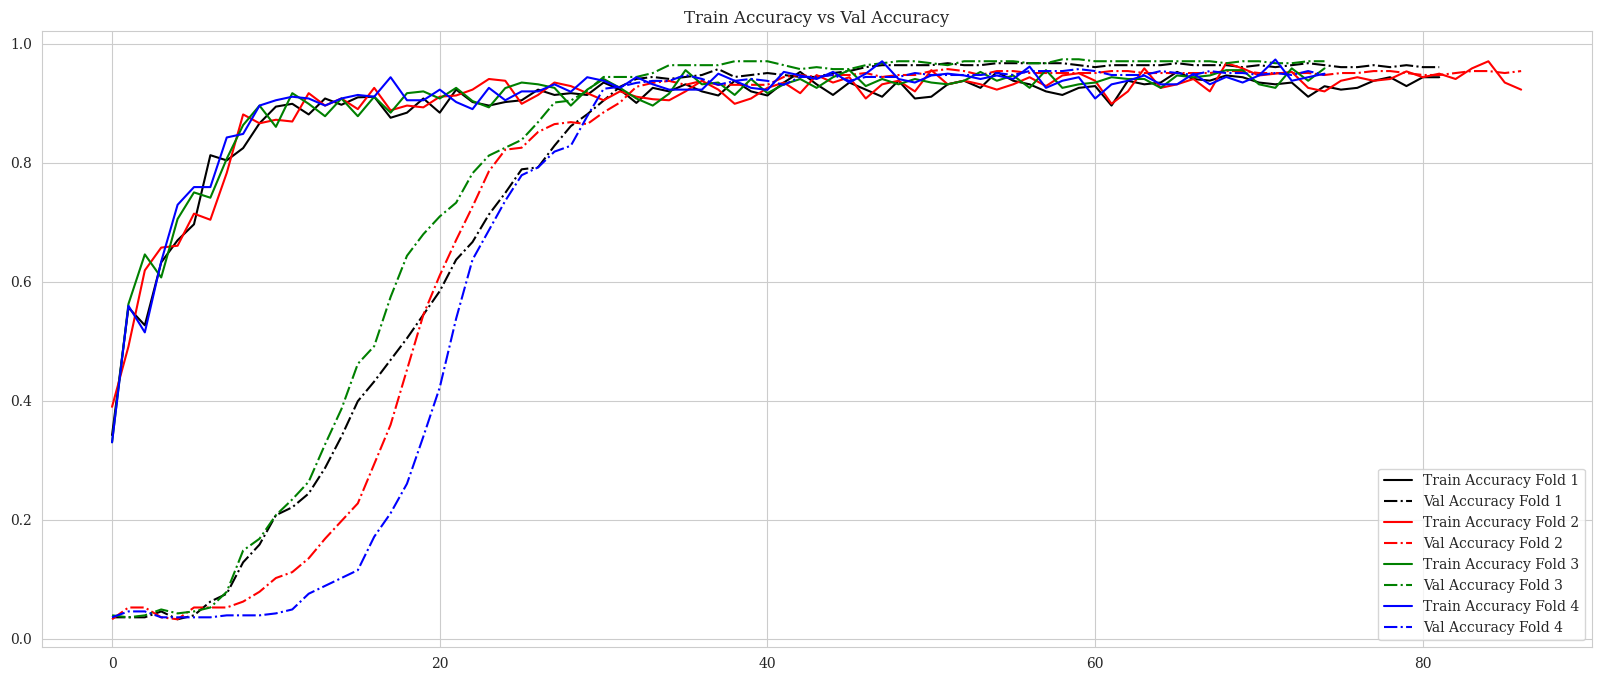

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(eff_model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(eff_model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(eff_model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(eff_model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
plt.plot(eff_model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
plt.plot(eff_model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
plt.plot(eff_model_history[3].history['accuracy'], label='Train Accuracy Fold 4', color='blue', )
plt.plot(eff_model_history[3].history['val_accuracy'], label='Val Accuracy Fold 4', color='blue', linestyle = "dashdot")
plt.legend()
plt.show()

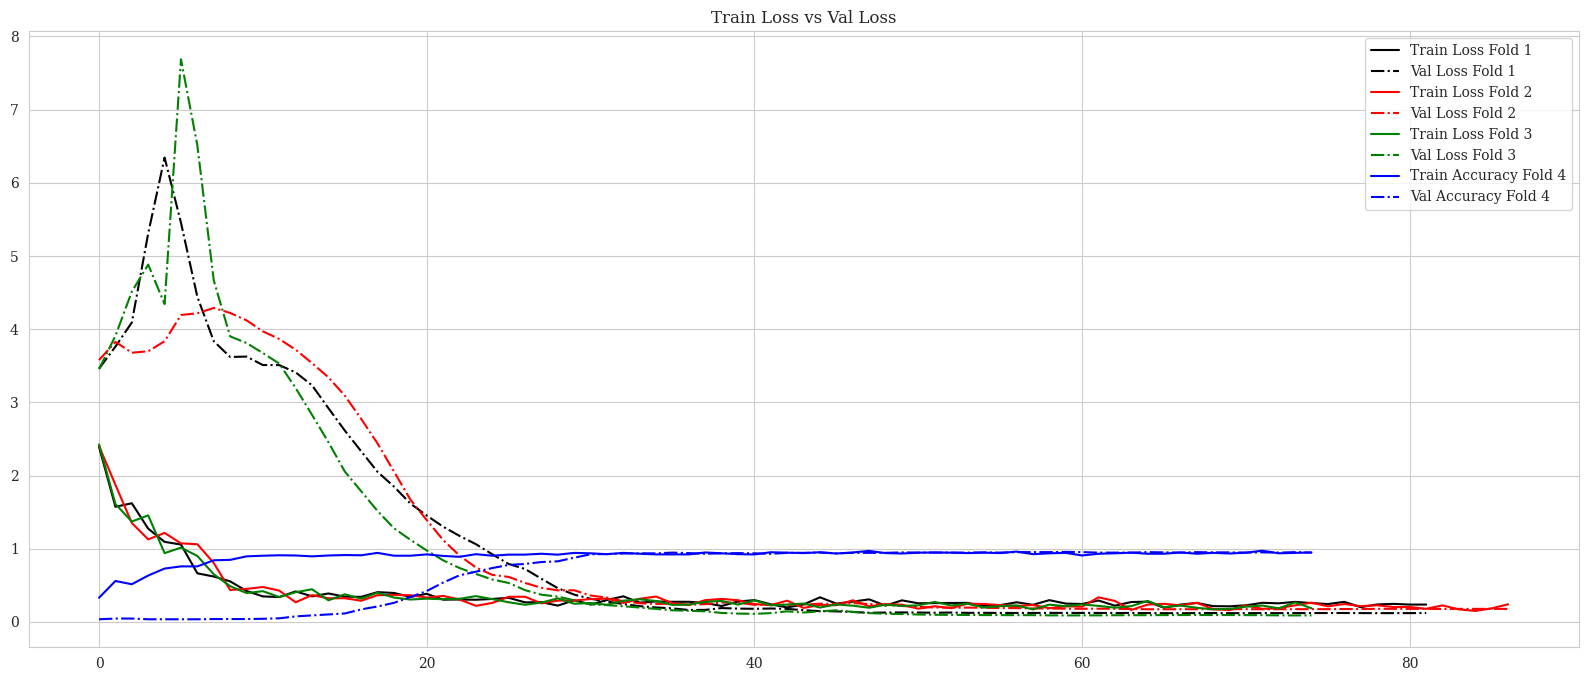

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Train Loss vs Val Loss')
plt.plot(eff_model_history[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(eff_model_history[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(eff_model_history[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(eff_model_history[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")
plt.plot(eff_model_history[2].history['loss'], label='Train Loss Fold 3', color='green', )
plt.plot(eff_model_history[2].history['val_loss'], label='Val Loss Fold 3', color='green', linestyle = "dashdot")
plt.plot(eff_model_history[3].history['accuracy'], label='Train Accuracy Fold 4', color='blue', )
plt.plot(eff_model_history[3].history['val_accuracy'], label='Val Accuracy Fold 4', color='blue', linestyle = "dashdot")
plt.legend()
plt.show()

**Load the saved checkpoint model**

In [ ]:
nFoldVGG16Model = load_model('/content/drive/MyDrive/eff/nfivefoldvgg.h5')
preds = nFoldVGG16Model.predict(x_test)  # Reduce batch size

predictions=np.argmax(preds,axis=1)

24/24 [==============================] - 17s 374ms/step


In [ ]:
from sklearn.metrics import classification_report
Y_test =np.argmax(y_test,axis=1)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.97      0.88      0.92        32
           2       0.85      0.82      0.84        28
           3       0.89      0.93      0.91        27
           4       0.88      1.00      0.93        28
           5       1.00      0.96      0.98        26
           6       0.86      0.96      0.91        26
           7       0.95      0.86      0.90        21
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        31
          10       0.67      0.89      0.76        27
          11       1.00      0.91      0.95        32
          12       1.00      1.00      1.00        25
          13       0.90      0.97      0.93        36
          14       0.97      0.94      0.95        31
          15       1.00      1.00      1.00        23
          16       0.92      0.89      0.91        38
          17       0.92    

(None,
                             precision  recall  f1-score
 1. Battery                     100.00   91.30     95.45
 2. DVD_Rom                      96.55   87.50     91.80
 3. Hinge                        85.19   82.14     83.64
 4. Keyboard                     89.29   92.59     90.91
 5. Motherboard                  87.50  100.00     93.33
 6. Dc_Cable                    100.00   96.15     98.04
 7. Power_Switch                 86.21   96.15     90.91
 8. RAM                          94.74   85.71     90.00
 9. Screw_Kit                   100.00  100.00    100.00
 10. USB_Port                   100.00  100.00    100.00
 11. Wifi_Card                   66.67   88.89     76.19
 12. Speaker                    100.00   90.62     95.08
 13. CMOS_Battery               100.00  100.00    100.00
 14. Hard_Disk_Drive             89.74   97.22     93.33
 15. Webcam                      96.67   93.55     95.08
 16. LCD_Screen                 100.00  100.00    100.00
 17. LCD_screen_panel_Be

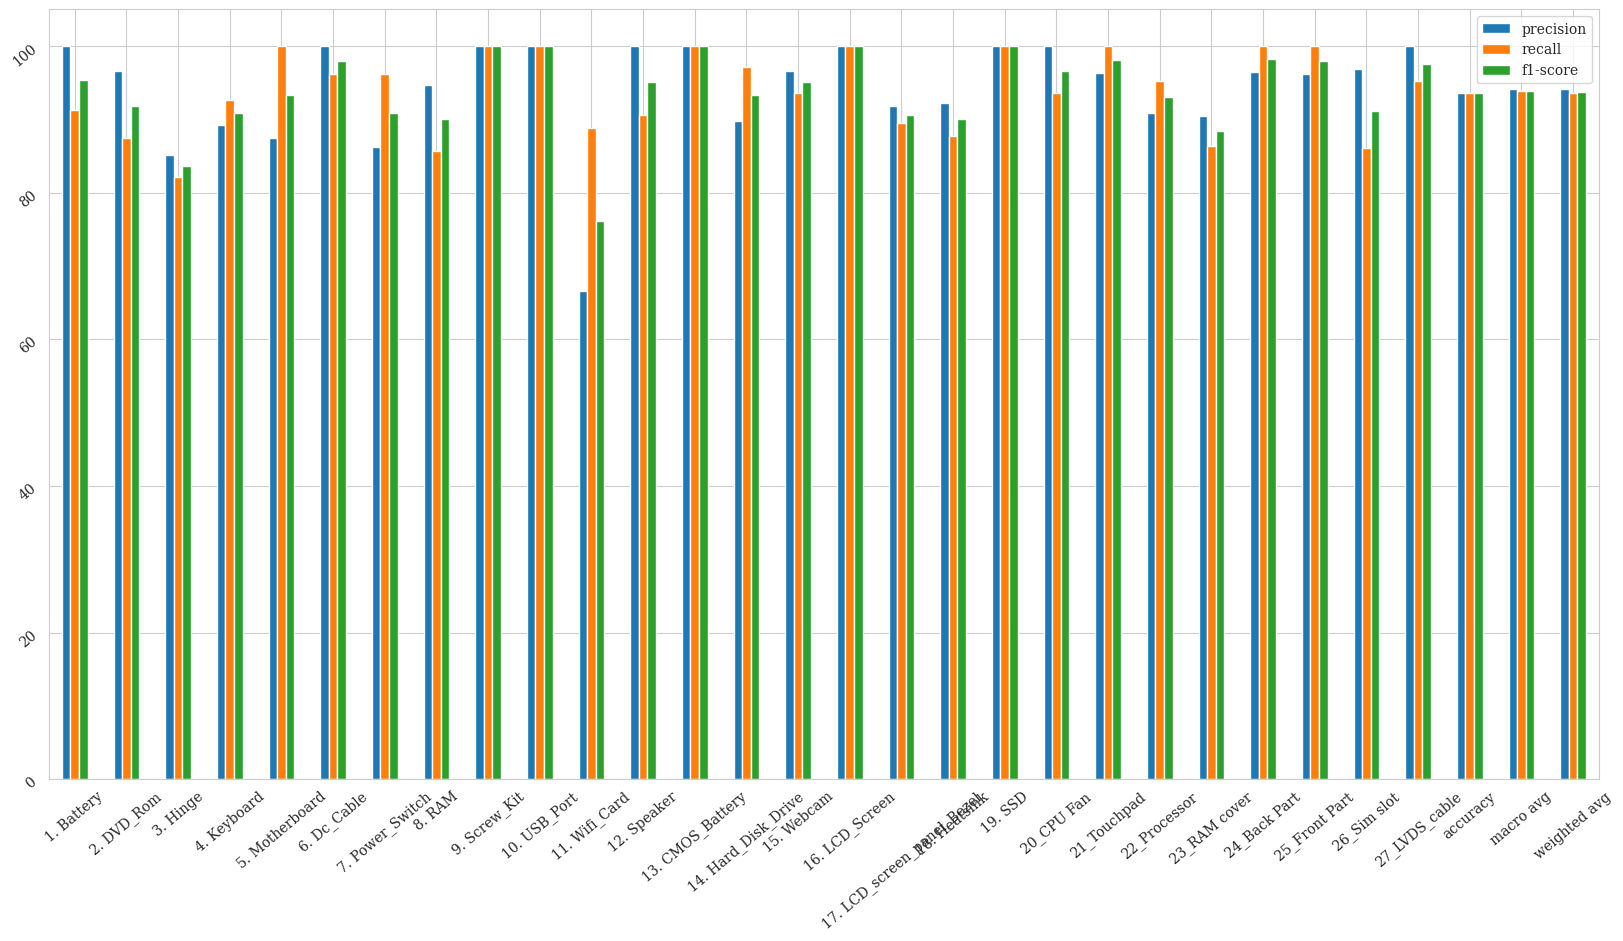

In [ ]:
report_generate(Y_test, predictions)

In [ ]:
#confusion matrix
def conf_matrix(Y_test, y_pred):
    cm = confusion_matrix(Y_test, y_pred)
# Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                       index = ['1. Battery', '2. DVD_Rom', '3. Hinge', '4. Keyboard', '5. Motherboard', '6. Dc_Cable', '7. Power_Switch', '8. RAM', '9. Screw_Kit',
                                '10. USB_Port',  '11. Wifi_Card', '12. Speaker','13. CMOS_Battery', '14. Hard_Disk_Drive','15. Webcam','16. LCD_Screen',
                                '17. LCD_screen_panel_Bezel','18. Heatsink','19. SSD', '20. CPU_Fan','21. Touchpad', '22. Processor','23. RAM_Cover',
                                '24. Base_Panel','25. Top_Panel','26. Sim_Slot','27. LVDS_DisplayRibbon_Cable'],
                       columns = ['1. Battery', '2. DVD_Rom', '3. Hinge', '4. Keyboard', '5. Motherboard', '6. Dc_Cable', '7. Power_Switch', '8. RAM', '9. Screw_Kit',
                                '10. USB_Port',  '11. Wifi_Card', '12. Speaker','13. CMOS_Battery', '14. Hard_Disk_Drive','15. Webcam','16. LCD_Screen',
                                '17. LCD_screen_panel_Bezel','18. Heatsink','19. SSD', '20. CPU_Fan','21. Touchpad', '22. Processor','23. RAM_Cover',
                                '24. Base_Panel','25. Top_Panel','26. Sim_Slot','27. LVDS_DisplayRibbon_Cable'])
    plt.figure(figsize=(30,15))
    sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(rotation = 75)
    plt.yticks(rotation = 15)
    plt.show()
    plt.close()



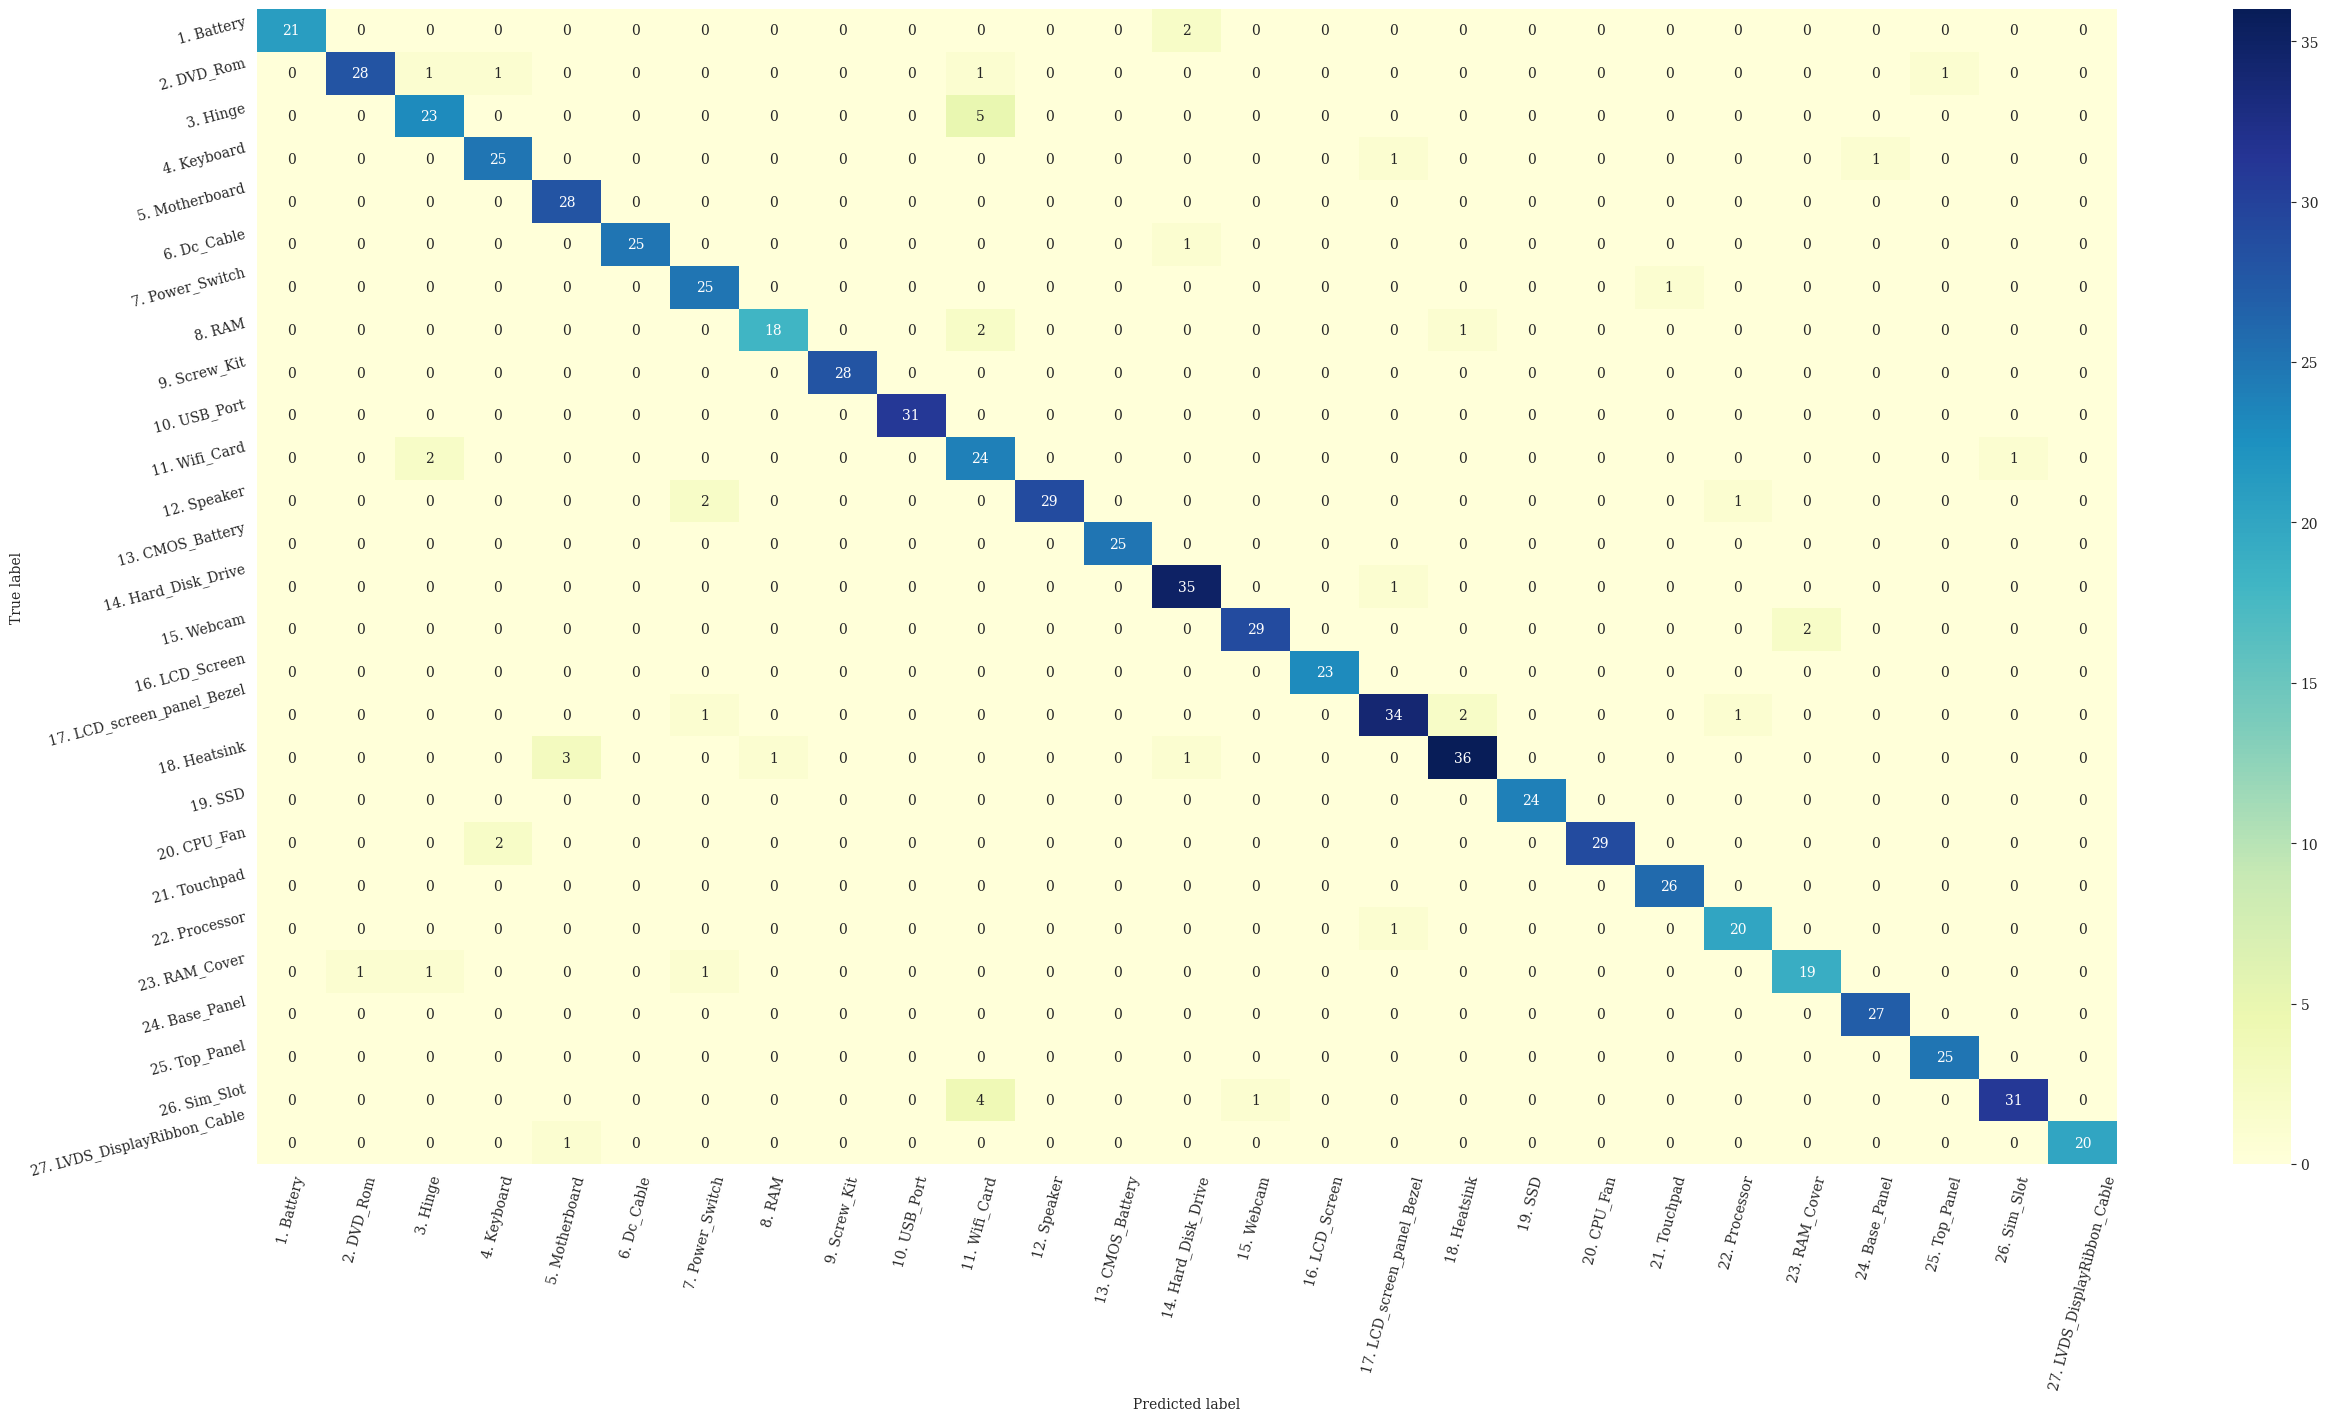

In [ ]:
conf_matrix(Y_test,predictions)

ROC AUC score: 0.968337073080413


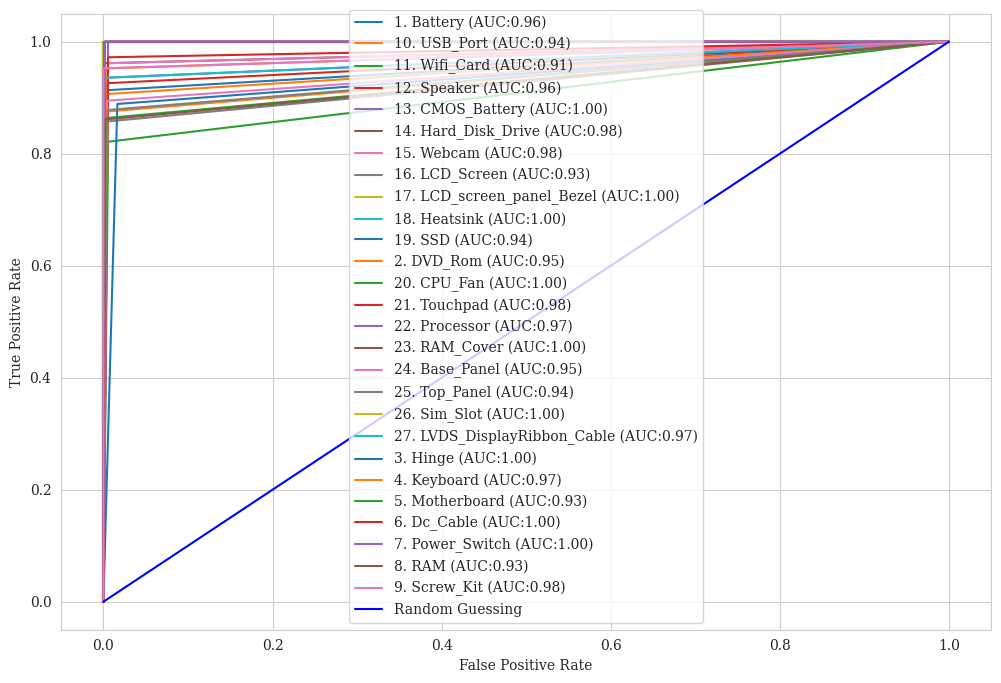

In [ ]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(Y_test,predictions))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


report

In [ ]:
base_model = tf.keras.applications.EfficientNetB7(
        include_top=False,
        weights="imagenet",  # you can set this to None if you don't want to use pre-trained weights
        input_shape=(224,224,3),
        pooling='avg'  # Global average pooling layer added
    )
base_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_10 (Rescaling)    (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_5 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_10[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_11 (Rescaling)    (None, 224, 224, 3)          0         ['normalization_5

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming you already have your model loaded as nFoldMobileNetV2Model
plot_model(nFoldVGG16Model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the image
from IPython.display import Image
Image(filename='model.png')

Output hidden; open in https://colab.research.google.com to view.

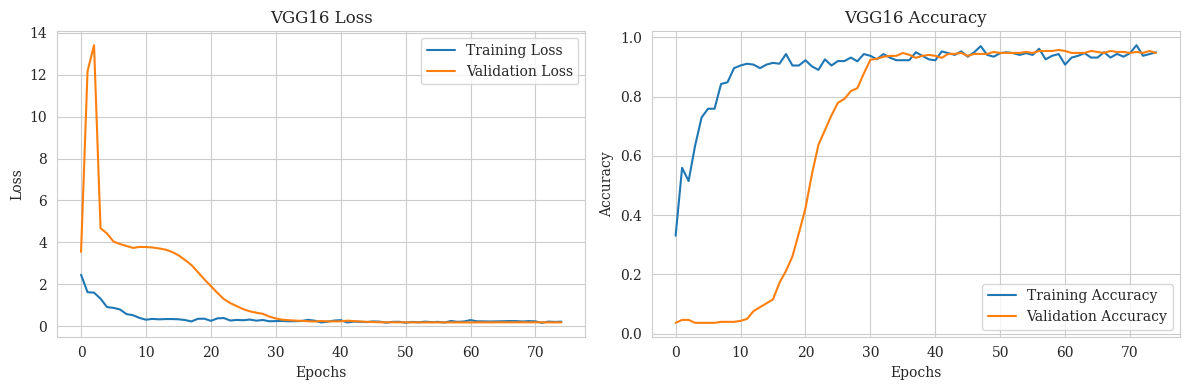

In [ ]:
import matplotlib.pyplot as plt

# Extracting the history for fold-5
history_data = eff_model_history[3].history

# Plotting loss
plt.figure(figsize=(12, 4))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(history_data['accuracy'], label='Training Accuracy')  # Adjust if your version uses 'acc'
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')  # Adjust if needed
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


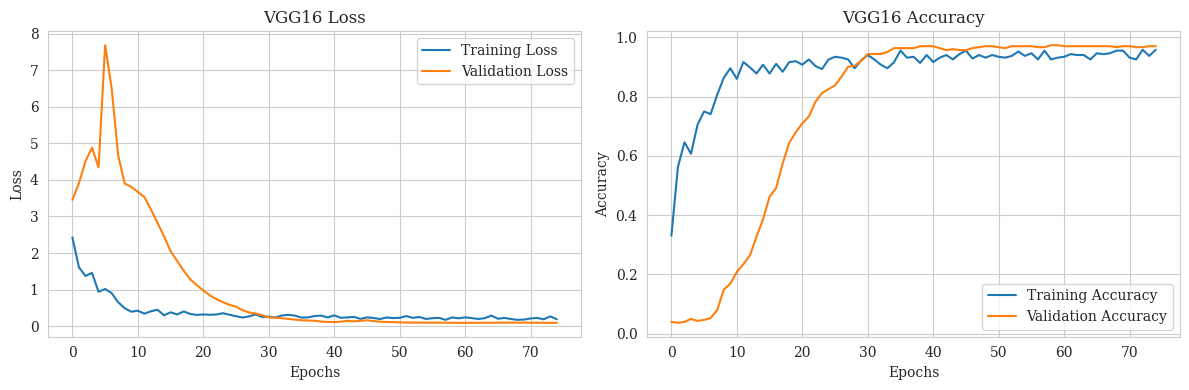

In [ ]:
import matplotlib.pyplot as plt

# Extracting the history for fold-5
history_data = eff_model_history[2].history

# Plotting loss
plt.figure(figsize=(12, 4))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(history_data['accuracy'], label='Training Accuracy')  # Adjust if your version uses 'acc'
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')  # Adjust if needed
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


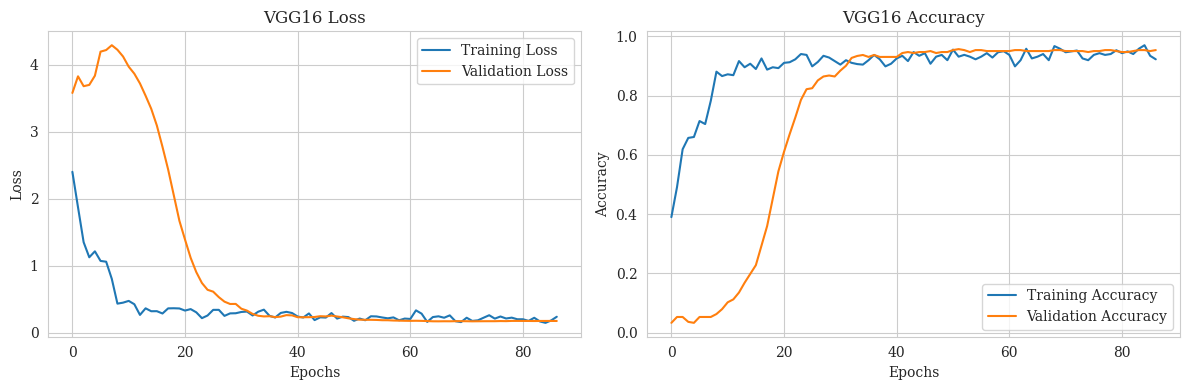

In [ ]:
import matplotlib.pyplot as plt

# Extracting the history for fold-5
history_data = eff_model_history[1].history

# Plotting loss
plt.figure(figsize=(12, 4))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(history_data['accuracy'], label='Training Accuracy')  # Adjust if your version uses 'acc'
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')  # Adjust if needed
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
nFoldVGG16Model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_2[0][0]'

In [ ]:
from tabulate import tabulate
input_shape = 224,224,3
base_model = tf.keras.applications.EfficientNetB7(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape
    )


# Extracting the layer details
layer_details = []
headers = ["Layer Name", "Layer Type", "#Filters/Neurons", "Filter Size (F)", "Stride (S)",
           "Size of Feature Map", "Activation Function"]

for layer in base_model.layers:
    # Extracting layer type and name
    layer_type = layer.__class__.__name__
    layer_name = layer.name

    # Extracting number of filters and filter size
    if hasattr(layer, 'filters') and hasattr(layer, 'kernel_size'):
        num_filters = layer.filters
        kernel_size = "x".join(map(str, layer.kernel_size))
    else:
        num_filters = '-'
        kernel_size = '-'

    # Extracting stride details
    if hasattr(layer, 'strides'):
        stride = "x".join(map(str, layer.strides))
    else:
        stride = '-'

    # Extracting output shape
    if hasattr(layer, 'output_shape') and len(layer.output_shape) > 1:
        feature_map_size = "x".join(map(str, layer.output_shape[1:3]))
    else:
        feature_map_size = '-'

    # Extracting activation function details
    activation = layer.get_config().get('activation', '-')

    layer_details.append([layer_name, layer_type, num_filters, kernel_size, stride, feature_map_size, activation])

# Displaying the table
print(tabulate(layer_details, headers=headers))


Layer Name                 Layer Type              #Filters/Neurons    Filter Size (F)    Stride (S)    Size of Feature Map    Activation Function
-------------------------  ----------------------  ------------------  -----------------  ------------  ---------------------  ---------------------
input_1                    InputLayer              -                   -                  -             -                      -
rescaling                  Rescaling               -                   -                  -             224x224                -
normalization              Normalization           -                   -                  -             224x224                -
rescaling_1                Rescaling               -                   -                  -             224x224                -
stem_conv_pad              ZeroPadding2D           -                   -                  -             225x225                -
stem_conv                  Conv2D                  64      

**time**